In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_2014 = pd.read_pickle('data_competitor_2014.pkl')
df_2015 = pd.read_pickle('data_competitor_2015.pkl')

In [3]:
G2014 = nx.from_pandas_edgelist(df_2014, 'source_ticker', 'target_ticker', create_using = nx.Graph())
G2015 = nx.from_pandas_edgelist(df_2015, 'source_ticker', 'target_ticker', create_using = nx.Graph())

In [4]:
standing_edges = pd.DataFrame(pd.Series(G2014.edges()), columns = ['standing edges'])

In [5]:
G2014_p = nx.complement(G2014)
potential_edges = pd.DataFrame(pd.Series(G2014_p.edges()), columns = ['potential edges'])

In [6]:
potential_edges = potential_edges.set_index('potential edges')

In [7]:
standing_edges = standing_edges.set_index('standing edges')

In [8]:
potential_edges['resource_allocation_index'] = [i[2] for i in nx.resource_allocation_index(G2014, potential_edges.index)]
potential_edges['jaccard_coefficient'] = [i[2] for i in nx.jaccard_coefficient(G2014, potential_edges.index)]
potential_edges['adamic_adar_index'] = [i[2] for i in nx.adamic_adar_index(G2014, potential_edges.index)]

In [9]:
standing_edges['resource_allocation_index'] = [i[2] for i in nx.resource_allocation_index(G2014, standing_edges.index)]
standing_edges['jaccard_coefficient'] = [i[2] for i in nx.jaccard_coefficient(G2014, standing_edges.index)]
standing_edges['adamic_adar_index'] = [i[2] for i in nx.adamic_adar_index(G2014, standing_edges.index)]

In [10]:
standing_edges['existing'] = 1

In [11]:
potential_edges['existing'] = 0

In [12]:
potential_edges.head()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing
potential edges,,,,
"(SPK-NZ, TIT-IT)",0.004566,0.500000,0.185561,0
"(SPK-NZ, TTEC)",0.004630,0.500000,0.186037,0
"(SPK-NZ, CRAY)",0.004630,0.333333,0.186037,0
"(SPK-NZ, DELL)",0.004630,0.015152,0.186037,0
"(SPK-NZ, THOR)",0.000000,0.000000,0.000000,0


In [13]:
potential_edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167729 entries, (SPK-NZ, TIT-IT) to (SYNT, TTWO)
Data columns (total 4 columns):
resource_allocation_index    167729 non-null float64
jaccard_coefficient          167729 non-null float64
adamic_adar_index            167729 non-null float64
existing                     167729 non-null int64
dtypes: float64(3), int64(1)
memory usage: 6.4+ MB


In [14]:
potential_edges.describe()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing
count,167729.000000,167729.000000,167729.000000,167729.0
mean,0.002327,0.173405,0.062877,0.0
std,0.022320,0.309401,0.120023,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.0
75%,0.004566,0.333333,0.185561,0.0
max,5.426852,1.000000,15.494065,0.0


In [15]:
standing_edges.head()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing
standing edges,,,,
"(SPK-NZ, IBM)",0.004566,0.004608,0.185561,1
"(SPK-NZ, MSFT)",0.004630,0.004545,0.186037,1
"(IBM, TTEC)",0.000000,0.000000,0.000000,1
"(IBM, CRAY)",0.015385,0.004608,0.239556,1
"(IBM, TSEM-IL)",0.000000,0.000000,0.000000,1


In [16]:
standing_edges.info()

<class 'pandas.core.frame.DataFrame'>
Index: 761 entries, (SPK-NZ, IBM) to (SERV, ROL)
Data columns (total 4 columns):
resource_allocation_index    761 non-null float64
jaccard_coefficient          761 non-null float64
adamic_adar_index            761 non-null float64
existing                     761 non-null int64
dtypes: float64(3), int64(1)
memory usage: 29.7+ KB


In [17]:
standing_edges.describe()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing
count,761.000000,761.000000,761.000000,761.0
mean,0.105368,0.005977,0.385614,1.0
std,1.512807,0.019222,4.330346,0.0
min,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,1.0
50%,0.000000,0.000000,0.000000,1.0
75%,0.004630,0.004608,0.186037,1.0
max,33.338889,0.250000,95.600714,1.0


In [18]:
existing_2014 = pd.concat([standing_edges, potential_edges])

In [19]:
existing_2014.describe().T

,count,mean,std,min,25%,50%,75%,max
resource_allocation_index,168490.0,0.002792,0.104244,0.0,0.0,0.0,0.004566,33.338889
jaccard_coefficient,168490.0,0.172649,0.308908,0.0,0.0,0.0,0.333333,1.000000
adamic_adar_index,168490.0,0.064335,0.315266,0.0,0.0,0.0,0.185561,95.600714
existing,168490.0,0.004517,0.067054,0.0,0.0,0.0,0.000000,1.000000


In [20]:
existing_2014.head()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing
"(SPK-NZ, IBM)",0.004566,0.004608,0.185561,1
"(SPK-NZ, MSFT)",0.004630,0.004545,0.186037,1
"(IBM, TTEC)",0.000000,0.000000,0.000000,1
"(IBM, CRAY)",0.015385,0.004608,0.239556,1
"(IBM, TSEM-IL)",0.000000,0.000000,0.000000,1


In [21]:
standing_edges_2015 = pd.DataFrame(pd.Series(G2015.edges()), columns = ['standing edges'])
standing_edges_2015 = standing_edges_2015.set_index('standing edges')
standing_edges_2015['existing_2015'] = 1

In [22]:
G2015_p = nx.complement(G2015)
potential_edges_2015 = pd.DataFrame(pd.Series(G2015_p.edges()), columns = ['potential edges'])
potential_edges_2015 = potential_edges_2015.set_index('potential edges')
potential_edges_2015['existing_2015'] = 0

In [23]:
existing_2015 = pd.concat([standing_edges_2015, potential_edges_2015])
existing_2015.head()

,existing_2015
"(TIT-IT, MSFT)",1
"(MSFT, THQIQ)",1
"(MSFT, DAEG)",1
"(MSFT, IACI)",1
"(MSFT, VRSN)",1


In [24]:
existing_2015.describe()

,existing_2015
count,157641.000000
mean,0.004612
std,0.067753
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [55]:
ml_edge = pd.concat([existing_2014, existing_2015], axis =1)

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [56]:
ml_edge = ml_edge.dropna()

In [57]:
ml_edge['diff'] = ml_edge['existing_2015'] - ml_edge['existing']

In [58]:
ml_edge_shrink = ml_edge.loc[(ml_edge['resource_allocation_index'] > 0) | (ml_edge['jaccard_coefficient'] > 0 ) | (ml_edge['adamic_adar_index'] > 0 )]

In [59]:
ml_edge_shrink1 = ml_edge.loc[(ml_edge['resource_allocation_index'] > 0) & (ml_edge['jaccard_coefficient'] > 0 ) & (ml_edge['adamic_adar_index'] > 0 )]

In [64]:
float(ml_edge['resource_allocation_index'].mode())

0.0

In [65]:
ml_edge_shrink2 = ml_edge_shrink1.loc[(ml_edge_shrink1['resource_allocation_index'] != float(ml_edge_shrink1['resource_allocation_index'].mode()))
                                      & (ml_edge_shrink1['jaccard_coefficient'] != float(ml_edge_shrink1['jaccard_coefficient'].mode()))
                                      & (ml_edge_shrink1['adamic_adar_index'] != float(ml_edge_shrink1['adamic_adar_index'].mode()))]

In [66]:
ml_edge_shrink2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 15626 entries, (003550-KR, BLIAQ) to (ZNGA, XSR-CA)
Data columns (total 6 columns):
resource_allocation_index    15626 non-null float64
jaccard_coefficient          15626 non-null float64
adamic_adar_index            15626 non-null float64
existing                     15626 non-null float64
existing_2015                15626 non-null float64
diff                         15626 non-null float64
dtypes: float64(6)
memory usage: 803.6+ KB


In [33]:
ml_edge_shrink.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 40603 entries, (003550-KR, BLIAQ) to (ZNGA, ZEN)
Data columns (total 6 columns):
resource_allocation_index    40603 non-null float64
jaccard_coefficient          40603 non-null float64
adamic_adar_index            40603 non-null float64
existing                     40603 non-null float64
existing_2015                40603 non-null float64
diff                         40603 non-null float64
dtypes: float64(6)
memory usage: 2.0+ MB


In [27]:
ml_edge.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 121037 entries, (003550-KR, 005930-KR) to (ZNGA, ZEN)
Data columns (total 5 columns):
resource_allocation_index    121037 non-null float64
jaccard_coefficient          121037 non-null float64
adamic_adar_index            121037 non-null float64
existing                     121037 non-null float64
existing_2015                121037 non-null float64
dtypes: float64(5)
memory usage: 5.1+ MB


In [30]:
ml_edge.head()

resource_allocation_index  jaccard_coefficient  \
003550-KR 005930-KR                        0.0                  0.0   
          030000-KR                        0.0                  0.0   
          039200-KR                        0.0                  0.0   
          041020-KR                        0.0                  0.0   
          093190-KR                        0.0                  0.0   

                     adamic_adar_index  existing  existing_2015  diff  
003550-KR 005930-KR                0.0       0.0            0.0   0.0  
          030000-KR                0.0       0.0            0.0   0.0  
          039200-KR                0.0       0.0            0.0   0.0  
          041020-KR                0.0       0.0            0.0   0.0  
          093190-KR                0.0       0.0            0.0   0.0

In [37]:
ml_edge_shrink1.describe()

,resource_allocation_index,jaccard_coefficient,adamic_adar_index,existing,existing_2015,diff
count,40603.000000,40603.000000,40603.000000,40603.000000,40603.000000,40603.000000
mean,0.008917,0.571293,0.219577,0.007709,0.007413,-0.000296
std,0.132591,0.282228,0.382545,0.087462,0.085782,0.023276
min,0.004566,0.004310,0.185561,0.000000,0.000000,-1.000000
25%,0.004566,0.333333,0.185561,0.000000,0.000000,0.000000
50%,0.004630,0.500000,0.186037,0.000000,0.000000,0.000000
75%,0.004630,1.000000,0.186037,0.000000,0.000000,0.000000
max,18.422222,1.000000,52.818099,1.000000,1.000000,1.000000


In [48]:
ml_edge_shrink1

resource_allocation_index  jaccard_coefficient  \
003550-KR BLIAQ                      0.010753             1.000000   
          CBB                        0.010753             1.000000   
          CHGG                       0.010753             1.000000   
          CRTN                       0.010753             1.000000   
          CTXS                       0.010753             0.333333   
          DIB-IT                     0.010753             0.500000   
          DISCA                      0.010753             0.500000   
          DLB                        0.010753             1.000000   
          DTAC-TH                    0.010753             1.000000   
          EBAY                       0.010753             0.333333   
          HAR                        0.010753             1.000000   
          HPQ                        0.010753             0.250000   
          KOPN                       0.010753             0.500000   
          LMCA                       0.010753             1.000000   
          MIFI                       0.010753             1.000000   
          MSI                        0.010753             1.000000   
          ORA-FR                     0.010753             0.333333   
          OUTR                       0.010753             1.000000   
          PCCC                       0.010753             0.500000   
          PCLN                       0.010753             0.500000   
          PCMI                       0.010753             0.500000   
          PLCM                       0.010753             0.333333   
          PLT                        0.010753             1.000000   
          PTNR-IL                    0.010753             0.500000   
          RCI.B-CA                   0.010753             0.500000   
          RNWK                       0.010753             0.500000   
          ROVI                       0.010753             0.333333   
          SIMG                       0.010753             1.000000   
          SMSI                       0.010753             0.500000   
          SNDK                       0.010753             1.000000   
...                                       ...                  ...   
ZNGA      PRGS                       0.004566             0.333333   
          PTNR-IL                    0.015319             1.000000   
          RCI.B-CA                   0.015319             1.000000   
          REDF                       0.004566             0.500000   
          RHT                        0.004566             0.333333   
          RNWK                       0.015319             1.000000   
          ROVI                       0.015319             0.666667   
          SABA                       0.004566             0.500000   
          SAP-DE                     0.004566             0.333333   
          SIMG                       0.010753             0.500000   
          SMSI                       0.015319             1.000000   
          SNDK                       0.010753             0.500000   
          SONS                       0.004566             0.333333   
          SPLS                       0.010753             0.500000   
          SYMC                       0.004566             0.250000   
          SYNC                       0.004566             0.500000   
          T-CA                       0.015319             0.666667   
          TIGR                       0.004566             0.500000   
          TIMP3-BR                   0.015319             1.000000   
          TISA                       0.004566             0.333333   
          TIVO                       0.015319             1.000000   
          TNE-AU                     0.004566             0.500000   
          TTWO                       0.004566             0.500000   
          TVN-PL                     0.004566             0.500000   
          UNTD                       0.004566             0.500000   
          VEEV                

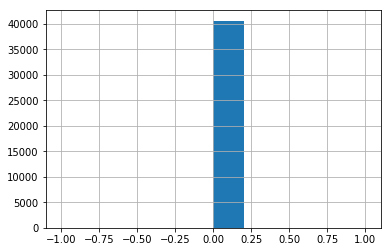

In [36]:
ml_edge_shrink['diff'].hist()

In [69]:
list(ml_edge_shrink2['diff']).count(-1)

11